# Airbnb Data Analysis

This notebook provides a full exploratory data analysis (EDA) of the Airbnb dataset.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [4]:

# Load Airbnb dataset
file_path = "/1730285881-Airbnb_Open_Data.xlsx"
df = pd.ExcelFile(file_path).parse(sheet_name=0)
df.head()


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0.0,strict,Private room,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,0.0,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,1.0,flexible,Private room,2005.0,620.0,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,1.0,moderate,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0.0,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [5]:

# Dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [6]:

# Missing values check
df.isnull().sum()


,0
id,0
NAME,270
host id,0
host_identity_verified,289
host name,408
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


## 1. Distribution of Listings by Neighborhood

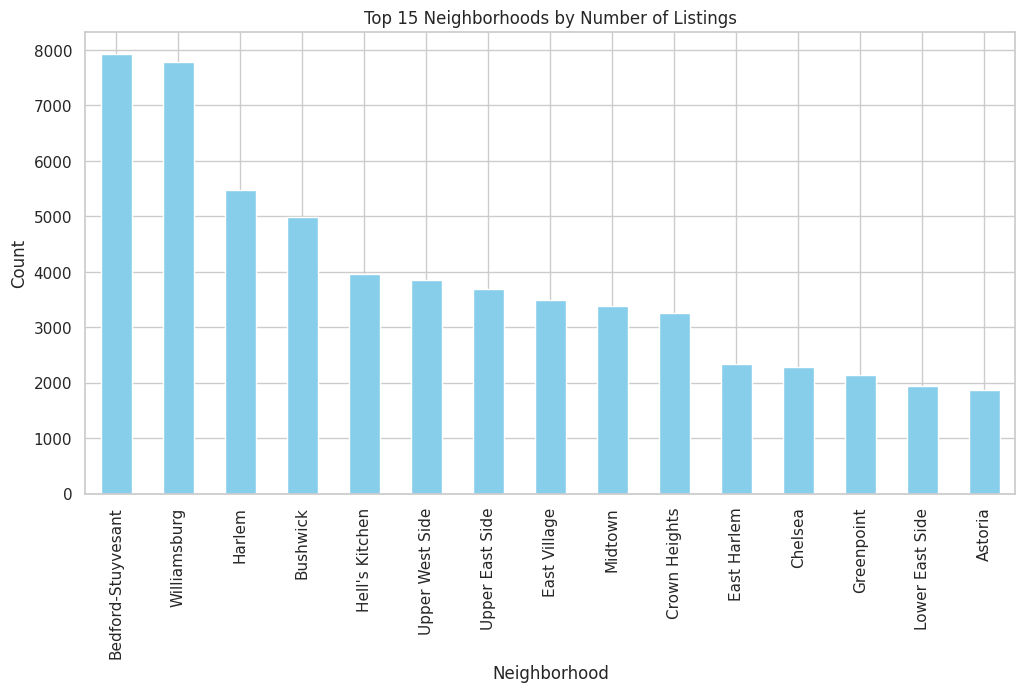

In [7]:

plt.figure(figsize=(12,6))
df['neighbourhood'].value_counts().head(15).plot(kind='bar', color='skyblue')
plt.title("Top 15 Neighborhoods by Number of Listings")
plt.ylabel("Count")
plt.xlabel("Neighborhood")
plt.show()


## 2. Price Distribution of Listings

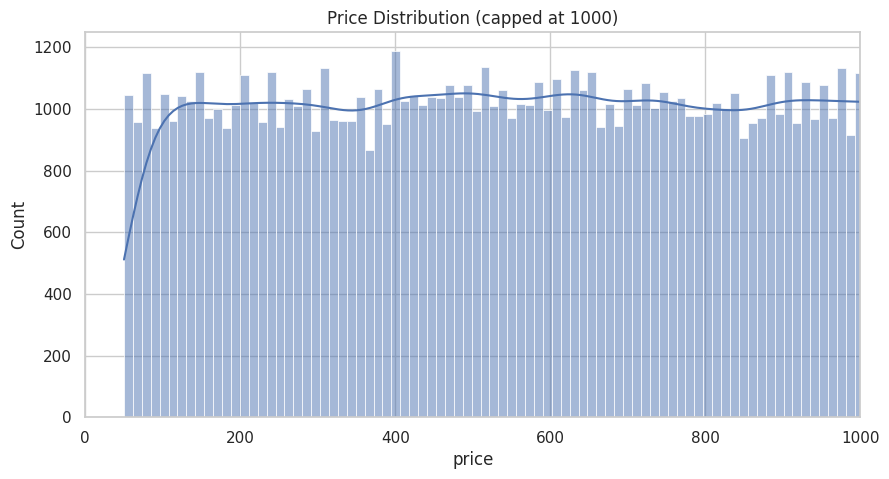

In [8]:

plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=100, kde=True)
plt.xlim(0, 1000)  # limit to avoid outliers
plt.title("Price Distribution (capped at 1000)")
plt.show()


## 3. Availability of Listings

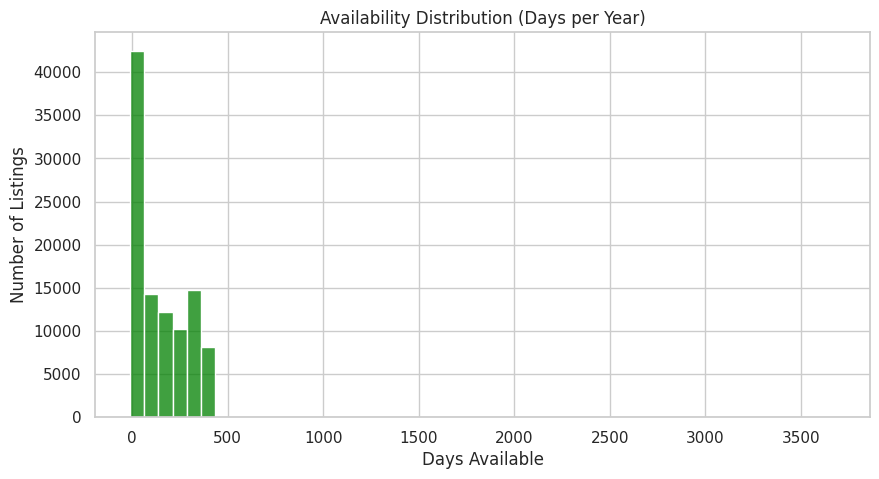

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(df['availability 365'], bins=50, kde=False, color='green')
plt.title("Availability Distribution (Days per Year)")
plt.xlabel("Days Available")
plt.ylabel("Number of Listings")
plt.show()

## 4. Room Type Popularity

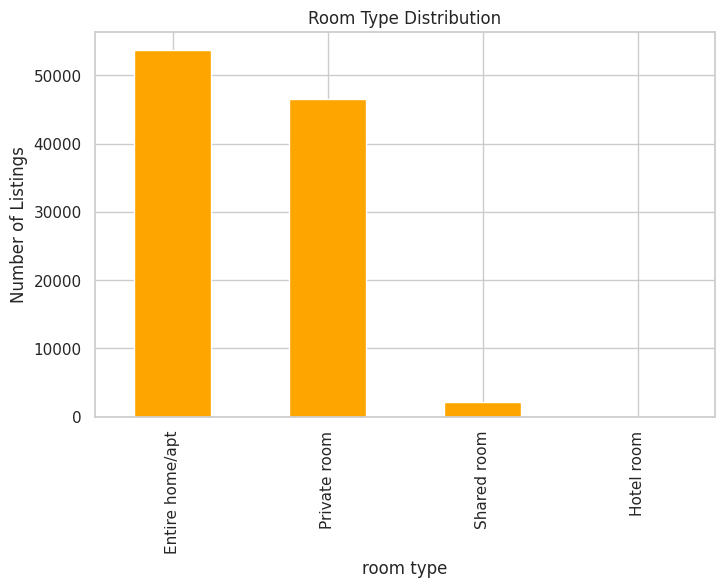

In [13]:
plt.figure(figsize=(8,5))
df['room type'].value_counts().plot(kind='bar', color='orange')
plt.title("Room Type Distribution")
plt.ylabel("Number of Listings")
plt.show()

## 5. Correlation Between Price and Number of Reviews

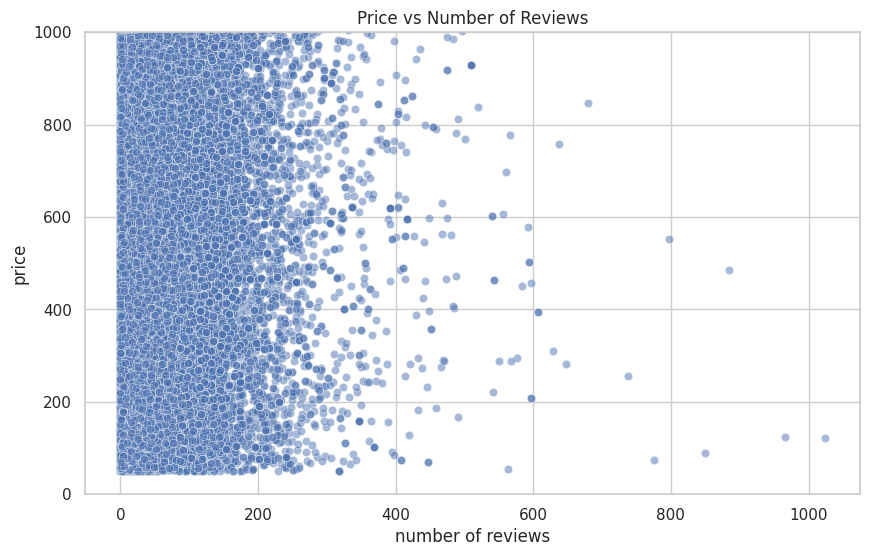

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='number of reviews', y='price', data=df, alpha=0.5)
plt.ylim(0, 1000)
plt.title("Price vs Number of Reviews")
plt.show()

## 6. Top Hosts by Number of Listings

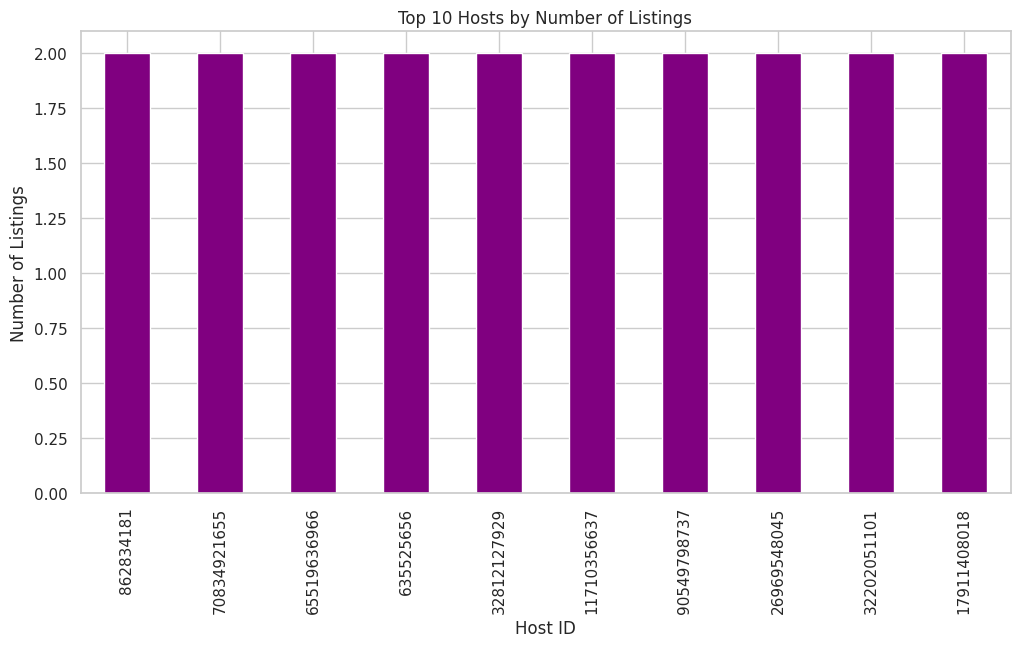

In [18]:
plt.figure(figsize=(12,6))
df['host id'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title("Top 10 Hosts by Number of Listings")
plt.ylabel("Number of Listings")
plt.xlabel("Host ID")
plt.show()

## 7. Review Trends Over Time

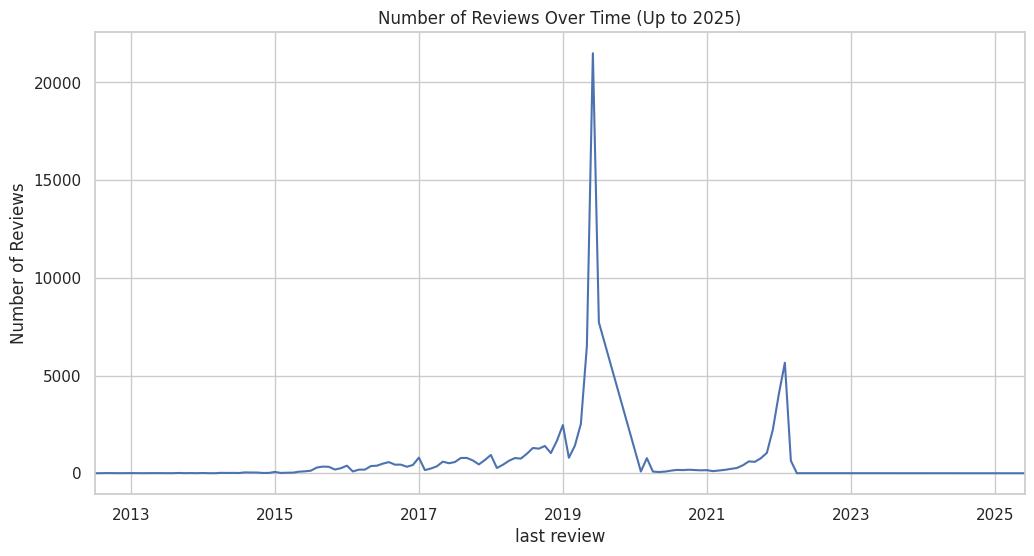

In [24]:
if 'last review' in df.columns:
    df['last review'] = pd.to_datetime(df['last review'], errors='coerce')
    reviews_over_time = df.groupby(df['last review'].dt.to_period("M")).size()

    # Filter data up to the end of 2025
    reviews_over_time = reviews_over_time[reviews_over_time.index.to_timestamp().year <= 2025]

    if len(reviews_over_time) > 1:
        reviews_over_time.plot(figsize=(12,6))
        plt.title("Number of Reviews Over Time (Up to 2025)")
        plt.ylabel("Number of Reviews")
        plt.show()
    else:
        print("Not enough data in 'last review' column up to 2025 to show a meaningful trend over time.")
        print("Consider checking for missing values in the 'last review' column.")

## 8. Average Price per Neighborhood

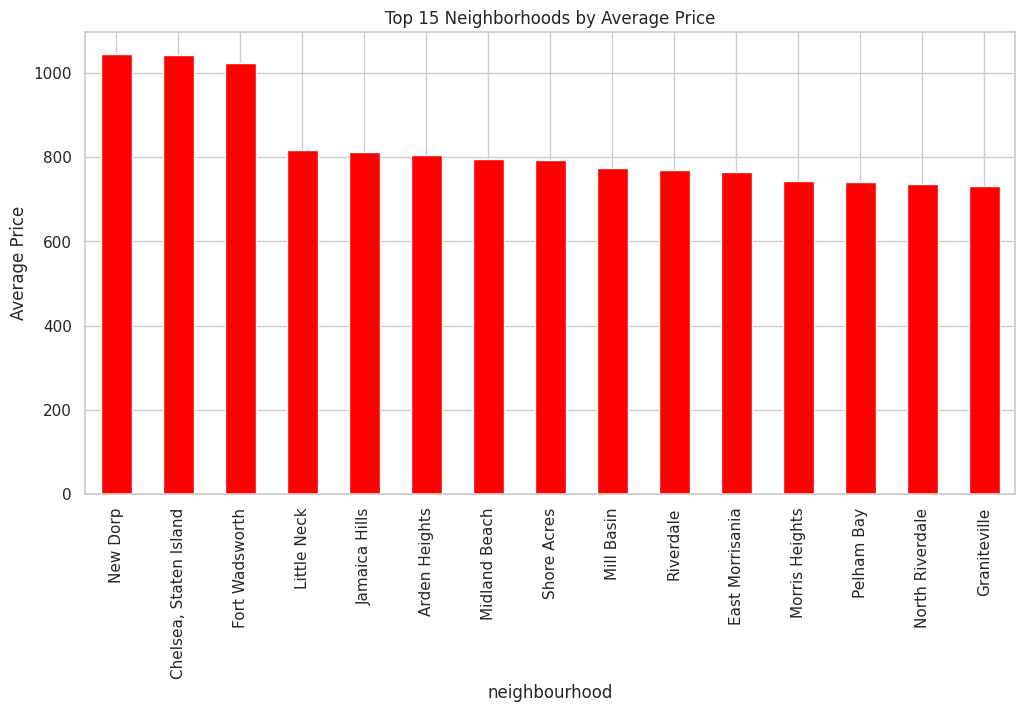

In [25]:

avg_price = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(12,6))
avg_price.plot(kind='bar', color='red')
plt.title("Top 15 Neighborhoods by Average Price")
plt.ylabel("Average Price")
plt.show()


## 9. Correlation Heatmap of Numerical Features

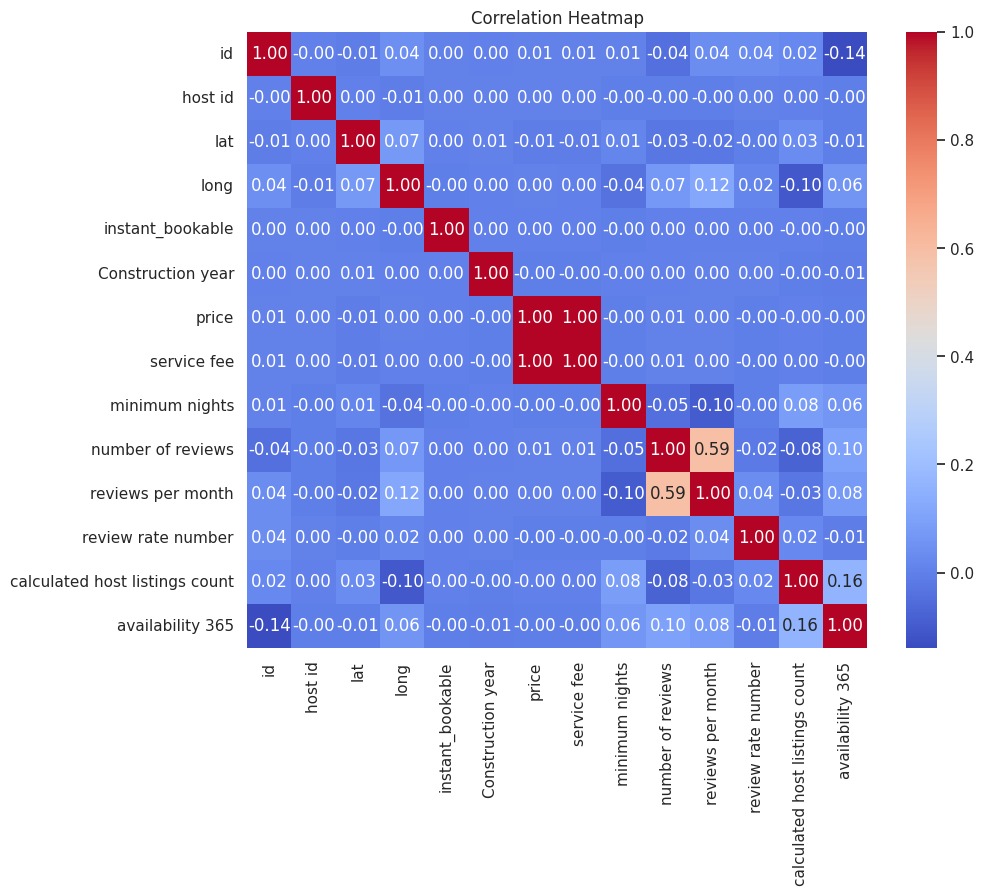

In [26]:

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## Summary & Insights

- Certain neighborhoods dominate in listing counts.
- Prices are highly skewed with many outliers.
- Most rooms are available for few days per year.
- Entire home/apt is the most popular room type.
- Some hosts control a large share of listings.
- Reviews show seasonal/time-based patterns.
- Prices vary significantly across neighborhoods.
- Strong correlations exist among availability, reviews, and price.